# 1-5 `pandas` and `sklearn`

In the weeks ahead, we will be creating document-term matrices, which are quite large. The heavy-lifting of creating the matrix will be handled by SciKit-Learn, but once we have a matrix we will want to be able to save it in a convenient form that will allow us to access the matrix later without having to create it. For that, we will use `pandas`, the Python Data Analysis library. 

First, we will import the libraries we need and set out MatPlotLib plot parameters to get higher-resolution graphics.

In [1]:
# IMPORTS
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PLOT PARAMETERS
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

We will start with code from last time:

In [2]:

# Define the function which will return
# the length of a text and its lexical diversity:M
def len_lexdiv(a_file):
    # open and read the file
    with open(a_file, mode="r") as f:
        the_string = f.read()    
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # get the length of the text in words
    the_length = len(the_words)
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / the_length
    # return the length and the percentage
    return the_length, lexdiv

# Test our code:
len_lexdiv('../data/mdg.txt')

(8017, 0.24285892478483223)

Next we do the same for our small corpus of short stories from 1924:

In [3]:
# This is a simple way to work through a list
# of files with known names. 
names = ["A", "B", "C", "D", "E", "F", "G", "H"]

lendivs = []
for name in names:
    the_file = "../data/1924/texts/"+name+".txt"
    (x, y) = len_lexdiv(the_file)
    lendivs.append((x,y))

print(lendivs)

[(1509, 0.3260437375745527), (4123, 0.3077855930147951), (8554, 0.23287350946925414), (5638, 0.28325647392692443), (6324, 0.23655913978494625), (7935, 0.2843100189035917), (6611, 0.25941612464075026), (5833, 0.24635693468198183)]


Now, instead of wandering around with a list of tuples, let's create a pandas dataframe which contain these values:

In [4]:
df = pd.DataFrame(lendivs)

print(df.shape)
print(df.head(10))

(8, 2)
      0         1
0  1509  0.326044
1  4123  0.307786
2  8554  0.232874
3  5638  0.283256
4  6324  0.236559
5  7935  0.284310
6  6611  0.259416
7  5833  0.246357


In [5]:
df.head(10)

,0,1
0,1509,0.326044
1,4123,0.307786
2,8554,0.232874
3,5638,0.283256
4,6324,0.236559
5,7935,0.284310
6,6611,0.259416
7,5833,0.246357


In [6]:
df["text"] = names
df.head(11)

,0,1,text
0,1509,0.326044,A
1,4123,0.307786,B
2,8554,0.232874,C
3,5638,0.283256,D
4,6324,0.236559,E
5,7935,0.284310,F
6,6611,0.259416,G
7,5833,0.246357,H


In [7]:
# In general, list comprehensions are the most "readable" for me:
# df = df[ ['text'] + [ col for col in df.columns if col != 'text' ] ]

# But this is more pandas-like:
col = df.pop("text")
df.insert(0, col.name, col)

# As always, check our results:
print(df)

  text     0         1
0    A  1509  0.326044
1    B  4123  0.307786
2    C  8554  0.232874
3    D  5638  0.283256
4    E  6324  0.236559
5    F  7935  0.284310
6    G  6611  0.259416
7    H  5833  0.246357


In [9]:
df.columns = ['text', 'length','lexdiv']
df.head()

,text,length,lexdiv
0,A,1509,0.326044
1,B,4123,0.307786
2,C,8554,0.232874
3,D,5638,0.283256
4,E,6324,0.236559


In [10]:
# pandas really is the easiest way to write to CSV
df.to_csv("../data/texts1.csv", index = False)

In [11]:
df2 = pd.read_csv("../data/texts1.csv")
df2.head()

,text,length,lexdiv
0,A,1509,0.326044
1,B,4123,0.307786
2,C,8554,0.232874
3,D,5638,0.283256
4,E,6324,0.236559


## Our First Model

In [12]:
# Read our csv into a pandas dataframe
df = pd.read_csv("../data/texts1.csv")

# Check our results
# df.shape, df.head(), print(df)
print(df.shape, df.columns.tolist())

(8, 3) ['text', 'length', 'lexdiv']


In [13]:
# Create our lists
labels = df.text.tolist()
x = df['length'].tolist()
y = df.lexdiv.tolist()

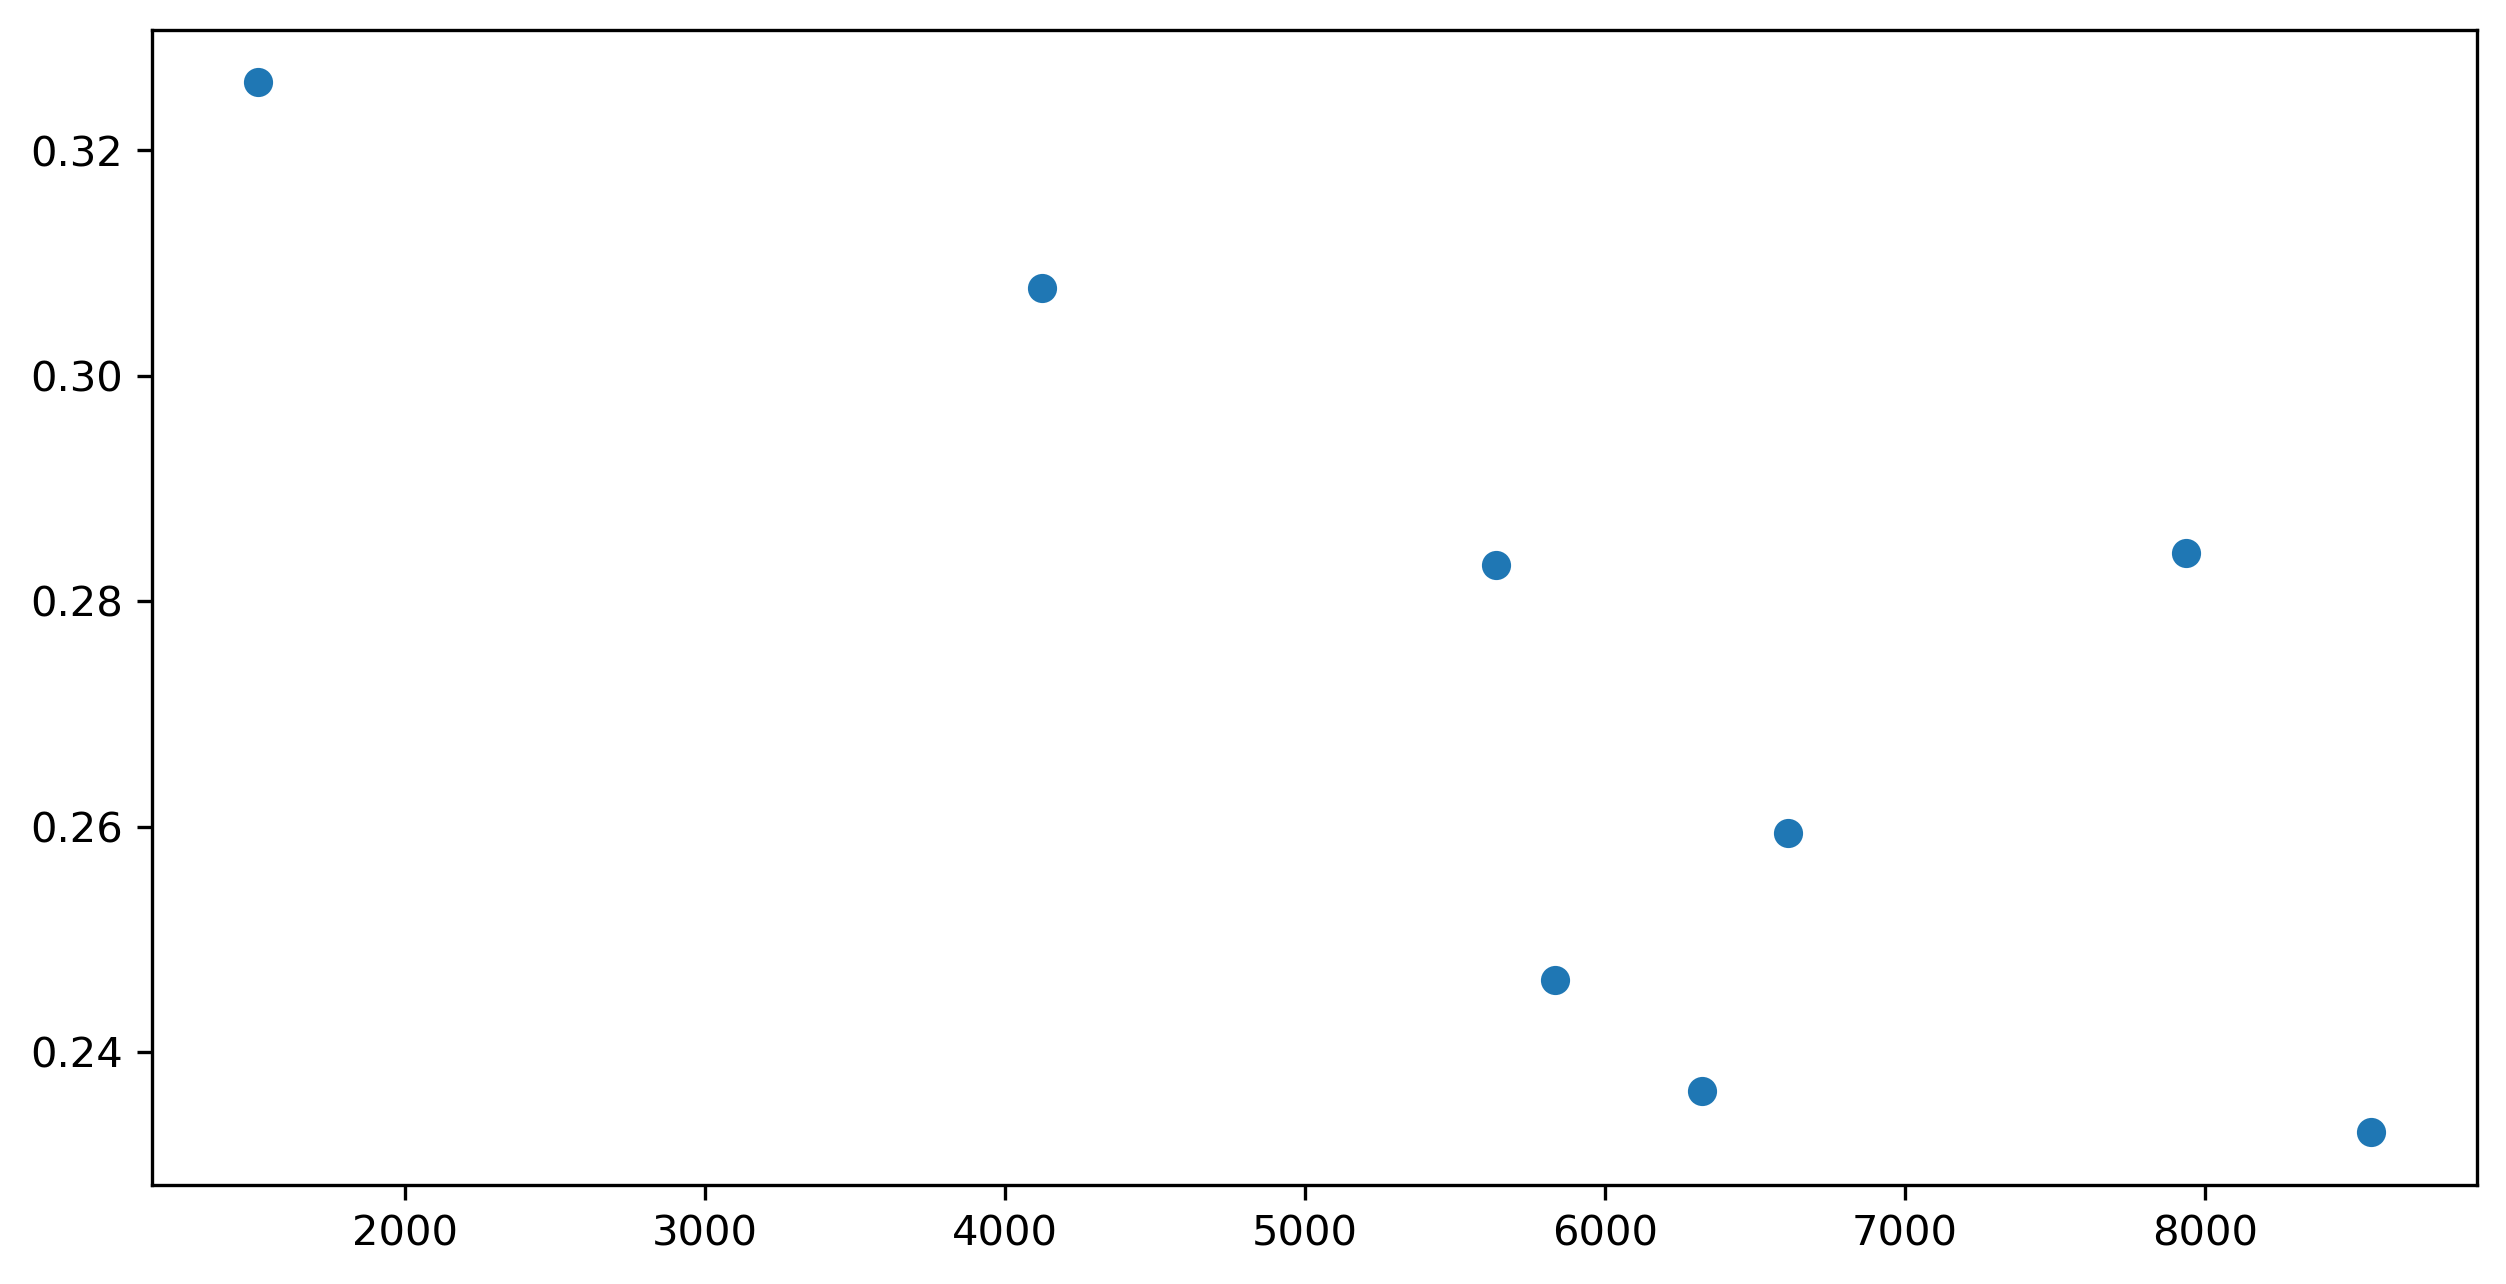

In [14]:
# Quick graph to remind ourselves
plt.scatter(x, y)

In [15]:
# Remember your old friend (or nemesis) y = mx + b?
m, b = np.polyfit(x, y, 1)
print(f"The line has a slope of {m:.7f} and a y-intercept of {b:.3f}.")

The line has a slope of -0.0000118 and a y-intercept of 0.341.


In [16]:
# Get m,b as array
coef = np.polyfit(x, y, 1)
print(type(coef), coef)

<class 'numpy.ndarray'> [-1.17942646e-05  3.40669160e-01]


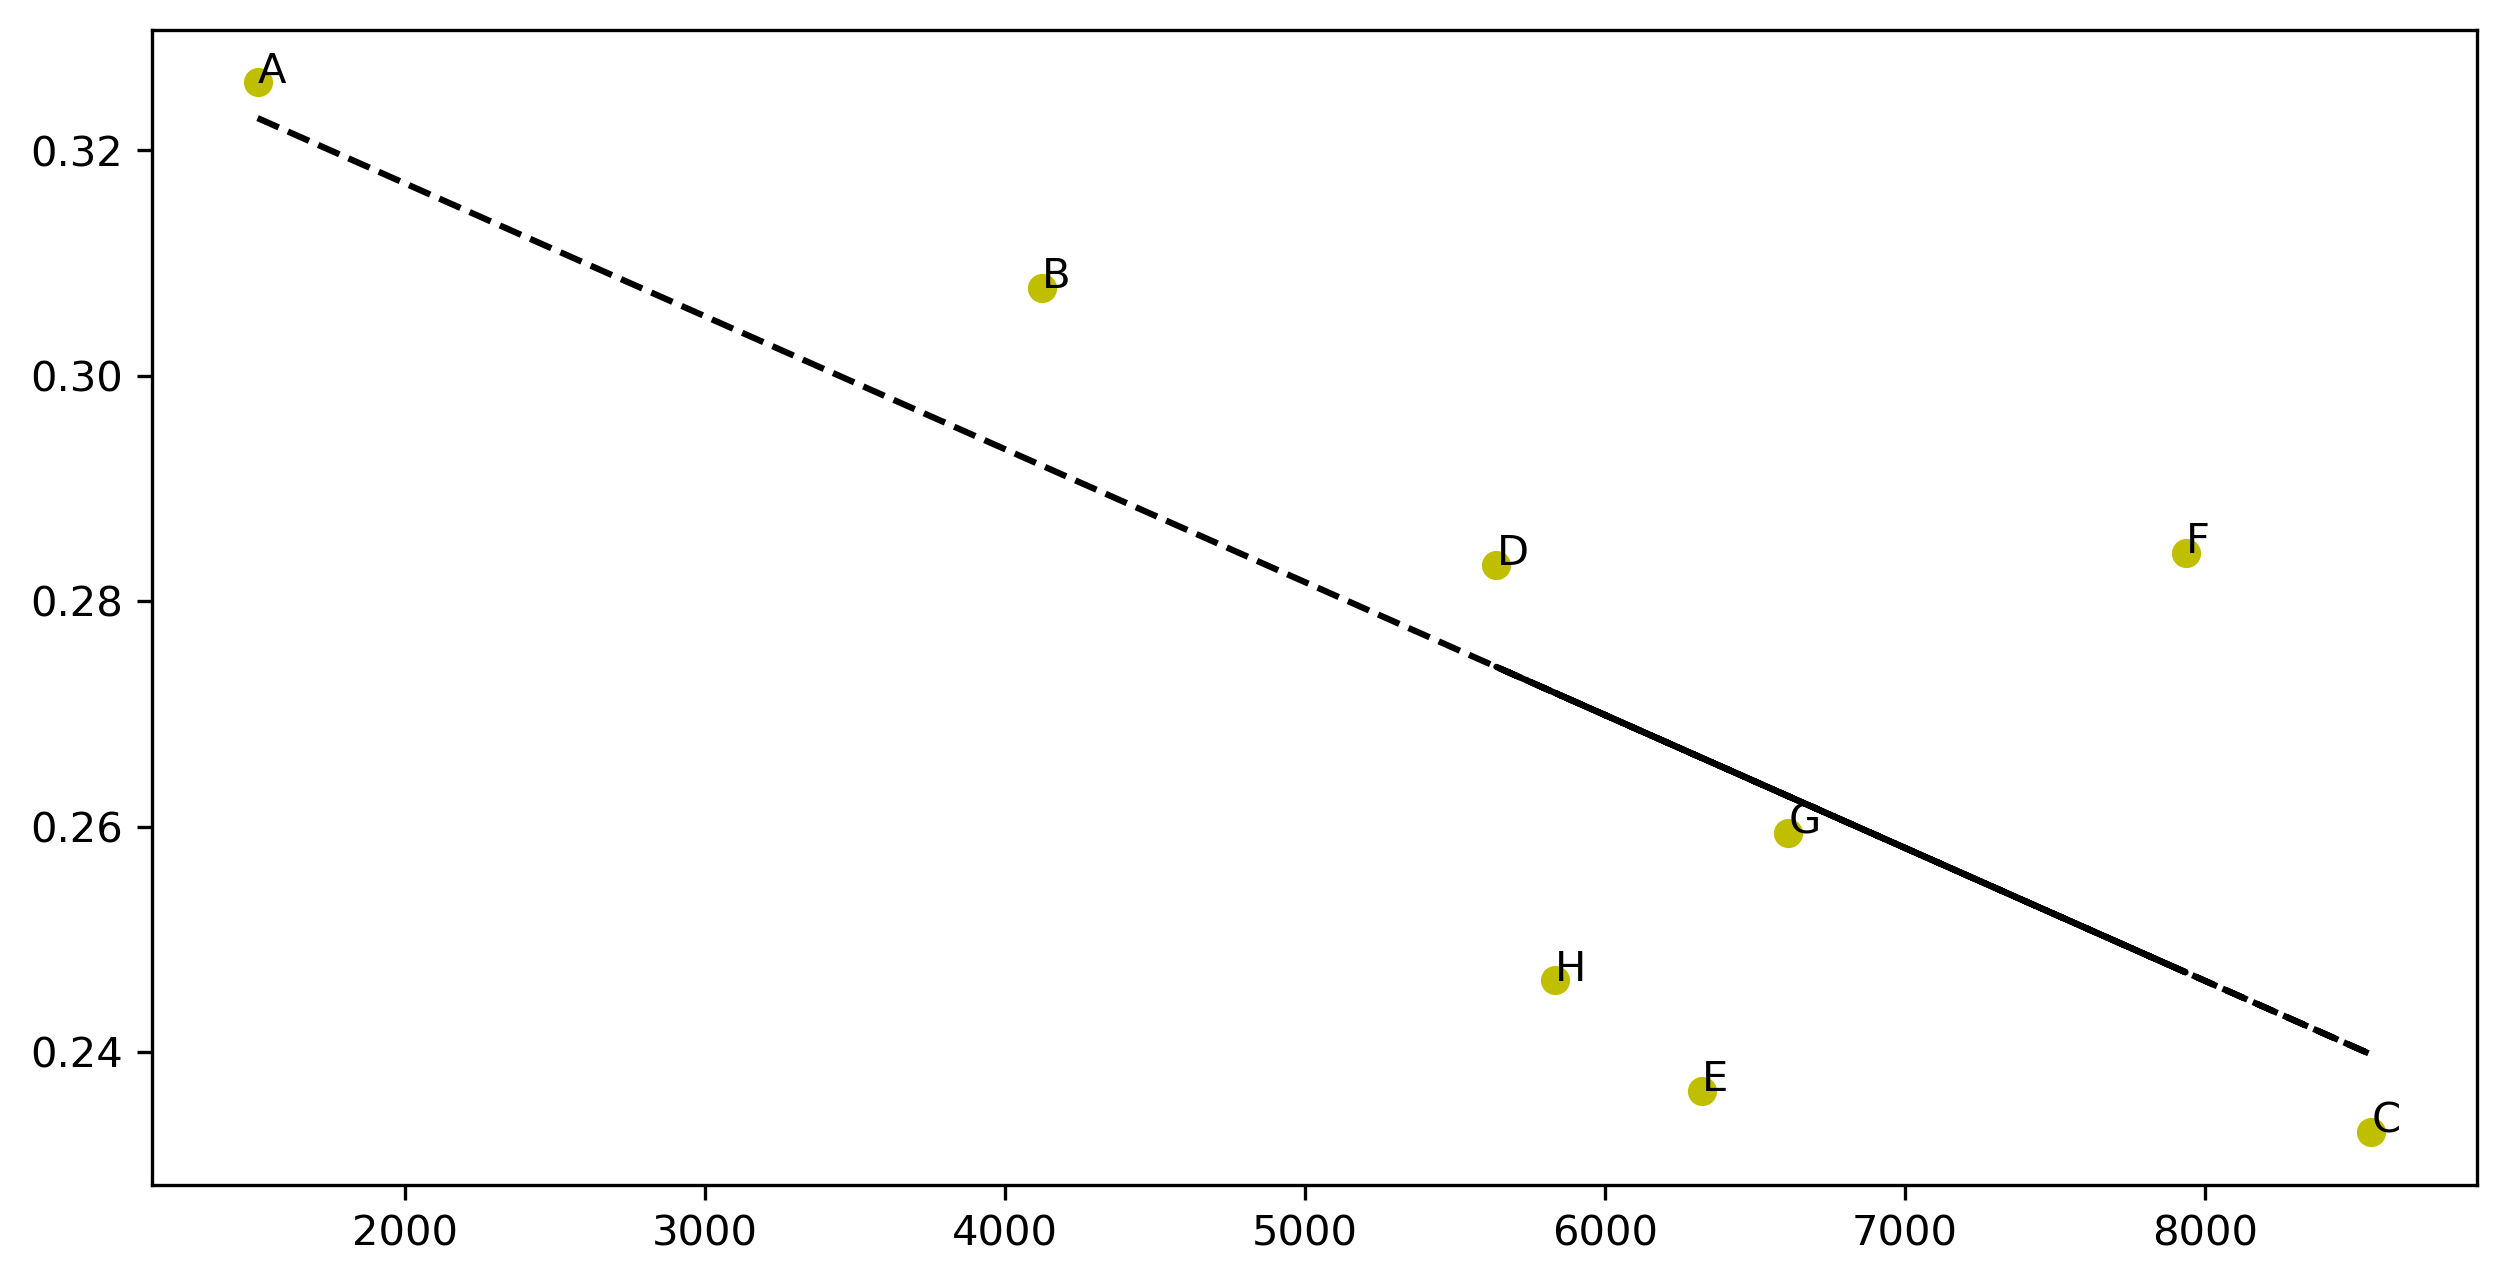

In [17]:

# Create function
poly1d_fn = np.poly1d(coef) 

# Create plot
# Because labeling is borked in mpl
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))
# '--k'=black dashed line, 'yo' = yellow circle marker
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') 

# And show it
plt.show()

In [ ]:
# To get a detailed breakdown you can use statsmodels
# OLS = Ordinary Least Squares
# import statsmodels.api as sm

# model = sm.OLS(y, sm.add_constant(x))
# results = model.fit()

# print(results.summary())

<div class="alert alert-block alert-warning">
<b>Your turn:</b> Below is a new text. Do what you need to do to get its length and then use the function above, <b>poly1d_fn</b>, to test the model's projection of its lexical diversity. How accurate is the model as a percentage of the actual <b>lexdiv</b> score?
</div>

### How I Worked the Problem

In [ ]:
# Open file and create string of words
test_file = open('../data/oz.txt').read()
test_words = re.sub("[^a-zA-Z']"," ", test_file).lower().split()

# Use model to predict the lexical diversity
projection = poly1d_fn(len(test_words))

# Get true diversity
lexdiv = len(set(test_words)) / len(test_words)

# Compile the results
print(f"The test document is {len(test_words)} words long.")
print(f"The model predicts a lexical diversity of {projection}.")
print(f"The true diversity is {lexdiv}.")